In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

# Get the Data

In [2]:
customers=pd.read_csv('Ecommerce Customers.csv')

# Check the head of customers, and check out its info() and describe() methods

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Exploratory Data Analysis

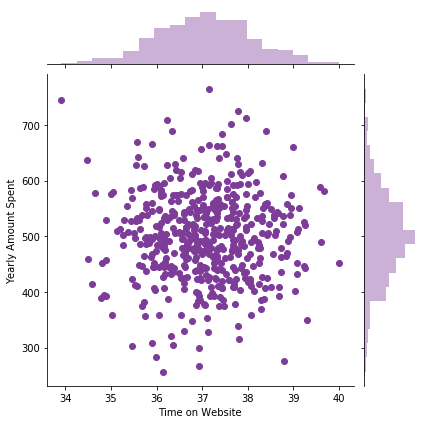

In [6]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers,color="#7D3C98")


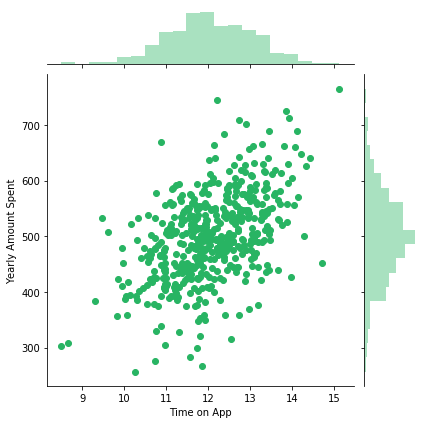

In [7]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers,color='#28B463')

Let's explore these types of relationships across the entire data set. Use pairplot to recreate the plot 

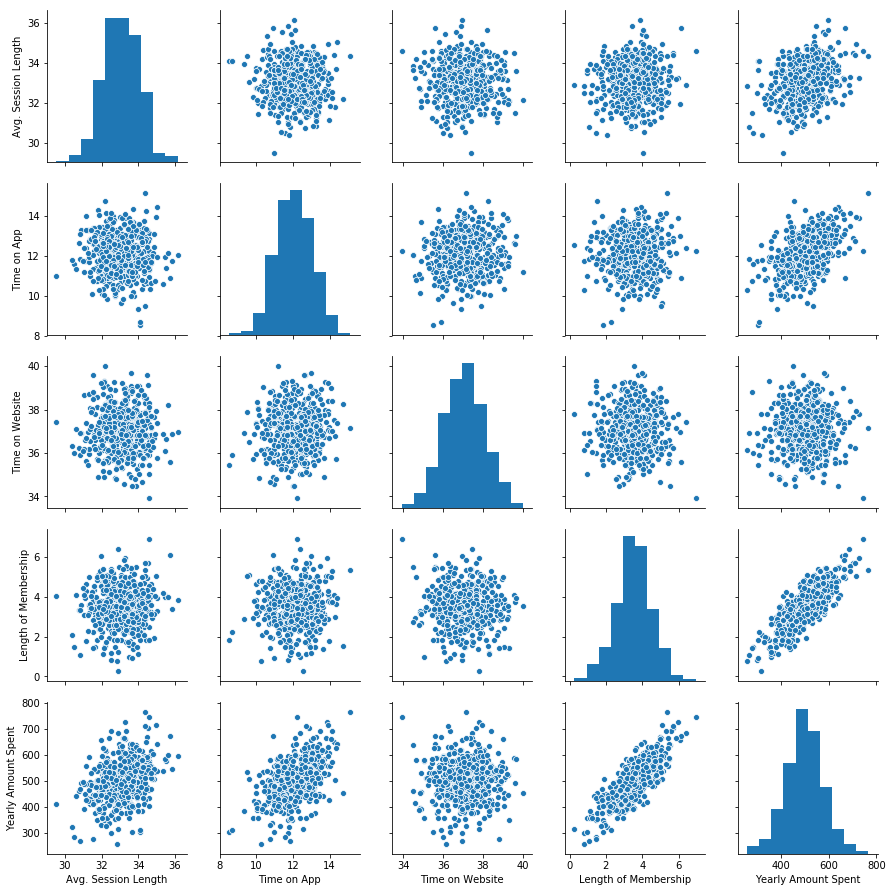

In [8]:
sns.pairplot(customers)

 Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership

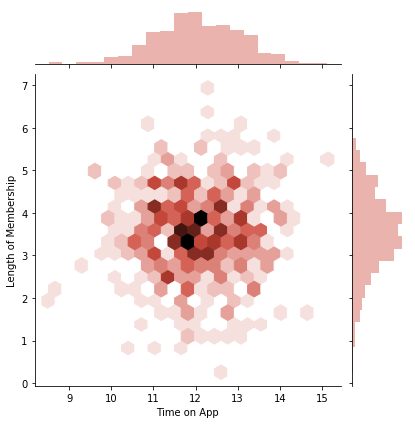

In [9]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers,color="#CB4335")

Create a linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. Length of Membership

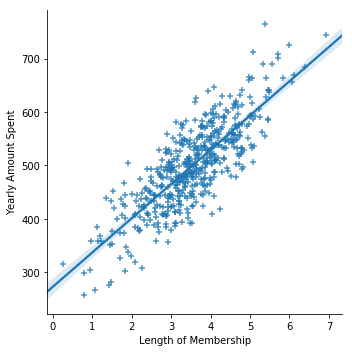

In [10]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers,markers="+")

Construct a heatmap of these correlations

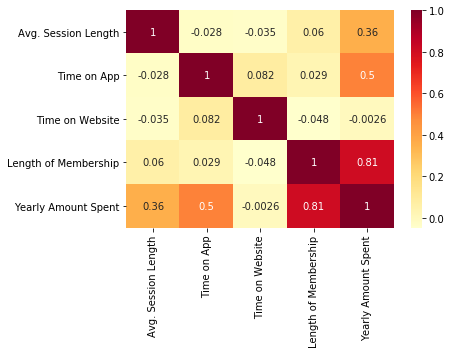

In [12]:
sns.heatmap(customers.corr(),cmap='YlOrRd',annot=True)

# Training and Testing Data

In [13]:
x=customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [14]:
y=customers['Yearly Amount Spent']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [17]:
x_train.shape

(350, 4)

In [18]:
x_test.shape

(150, 4)

In [19]:
y_train.shape

(350,)

In [20]:
y_test.shape

(150,)

# Training and Testing Data

In [21]:
from sklearn.linear_model import LinearRegression


In [22]:
lm=LinearRegression()

In [23]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Print out the coefficients of the model

In [24]:
print("Coefficients: \n",lm.coef_)
cdf=pd.DataFrame(lm.coef_,x.columns,columns=['Ceoff'])
cdf


Coefficients: 
 [25.82792018 38.80900145  0.28174274 61.30479927]


,Ceoff
Avg. Session Length,25.827920
Time on App,38.809001
Time on Website,0.281743
Length of Membership,61.304799


In [25]:
new_cdf=cdf.reset_index()

In [26]:
new_cdf=pd.DataFrame(new_cdf)
new_cdf.columns=(["Parameter","Coefficients"])
new_cdf

,Parameter,Coefficients
0,Avg. Session Length,25.827920
1,Time on App,38.809001
2,Time on Website,0.281743
3,Length of Membership,61.304799


In [27]:
print("Intreceft :\n",lm.intercept_)

Intreceft :
 -1048.8204290065084


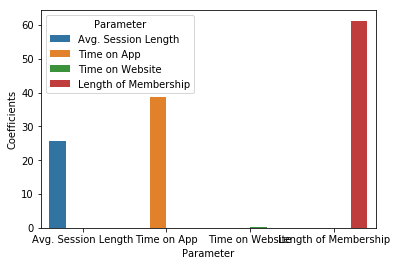

In [28]:
sns.barplot(x="Parameter",y="Coefficients",data=new_cdf,hue="Parameter")

# Predicting Test Data

In [29]:
predict=lm.predict(x_test)

Text(0, 0.5, 'Y predict')

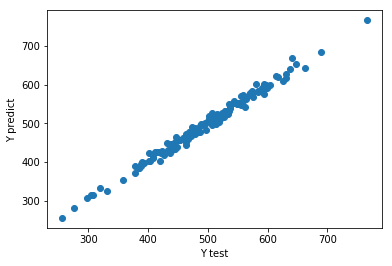

In [30]:
plt.scatter(y_test,predict)
plt.xlabel("Y test")
plt.ylabel("Y predict")

# Evaluating the Model

In [31]:
from sklearn import metrics


In [32]:
print("MAS :",metrics.mean_absolute_error(y_test,predict))
print("MSE :",metrics.mean_squared_error(y_test,predict))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predict)))

MAS : 7.099124594093846
MSE : 80.90062369759957
RMSE: 8.994477399915993


# Residuals
Plot a histogram of the residuals and make sure it looks normally distributed

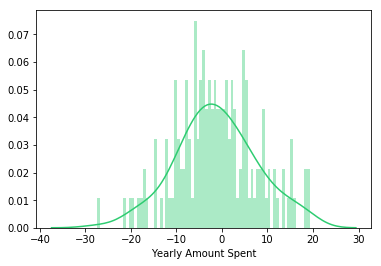

In [33]:
sns.distplot((y_test-predict),bins=75,color="#2ECC71")

# Conclusion

In [34]:
print(new_cdf)

              Parameter  Coefficients
0   Avg. Session Length     25.827920
1           Time on App     38.809001
2       Time on Website      0.281743
3  Length of Membership     61.304799


# Interpreting the coefficients:



Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.


Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.


Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.


Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent